<h1>В рамках этой части задания ответьте в ноутбуке на следующие вопросы:</h1>

1. Общее исследование данных: проверить размеры таблицы, число столбцов, количество пропусков в столбцах (1 балл).
2. Однофакторный анализ: по каждому столбцу посмотреть его распределение. Если есть пропуски и ошибочные значения - обработать их. Посмотреть связь с целевой переменной (3 балла).
3. Построить матрицу корреляций (или ее аналог для категориальных признаков): использовать корреляции, тест $χ^2$, ANOVA (2 балла).
4. Провести анализ целевой переменной - на какое распределение больше всего похожа ее гистограмма? Какие проблемы в связи с этим могут возникнуть при обучении моделей? (1 балл)
5. Увеличить размер данных простым дублированием до `1_000_000` строк в датасете. Провести сравнение скорости работы Pandas и Polars на увеличенном датасете по параметрам:
* загрузка данных (1 балл)
* фильтрация данных (1 балл)
* агрегация данных (1 балл)

In [1]:
import warnings

# Отключение FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ABALONE_DATASET = "https://github.com/aiedu-courses/eda_and_dev_tools/blob/main/datasets/abalone.csv"

<h1> Datasets Descriptions Abalone</h1>
<h2>Predict the age of abalone from physical measurements</h2>

`Sex` - nominal - M, F, and I (infant)

`Length` - continuous - mm - Longest shell measurement

`Diameter` - continuous - mm - perpendicular to length

`Height` - continuous - mm - with meat in shell

`Whole weight` - continuous - grams - whole abalone

`Shucked weight` - continuous - grams - weight of meat

`Viscera weight` - continuous - grams - gut weight (after bleeding)

`Shell weight` - continuous - grams - after being dried

`Rings` - integer - +1.5 gives the age in years (target)

[Link](https://archive.ics.uci.edu/dataset/1/abalone) to the description of the original dataset.

In [4]:
from pathlib import Path
df = pd.read_csv(Path('dataset/abalone.csv'))

<h2>1. Общее исследование данных</h2>

In [5]:
#проверка на наличие ошибочных столбцов в sex
df['Sex'].unique()

array(['M', 'F', 'I', 'f'], dtype=object)

In [6]:
#изменяем ошибочный столбец f на F
df['Sex'] = df['Sex'].replace('f', 'F')

In [7]:
#меняем тип столбца sex, тк он категоральный
df['Sex'] = df['Sex'].astype('category')

In [8]:
#размерность
df.shape

(4177, 9)

In [9]:
#подробная информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4078 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4078 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4127 non-null   float64 
 8   Rings           4177 non-null   int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 265.4 KB


In [10]:
#полезные значения числовых типов
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
# # Функция для вычисления выбросов
# def calculate_outliers(series):
#     Q1 = series.quantile(0.25)
#     Q3 = series.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = series[(series < lower_bound) | (series > upper_bound)]
#     return outliers

# # Словарь для хранения выбросов
# outliers_dict = {}

# # Вычисляем выбросы для каждого числового столбца
# for column in numeric_columns:
#     outliers = calculate_outliers(df[column])
#     outliers_dict[column] = outliers

# # Выводим результаты
# for column, outliers in outliers_dict.items():
#     print(f'Выбросы для {column}:')
#     print(outliers)
#     print()

In [12]:
#полезные значения категоральных типов
df.describe(include='category')

,Sex
count,4177
unique,3
top,F
freq,1454


In [13]:
#поиск дупликатов
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


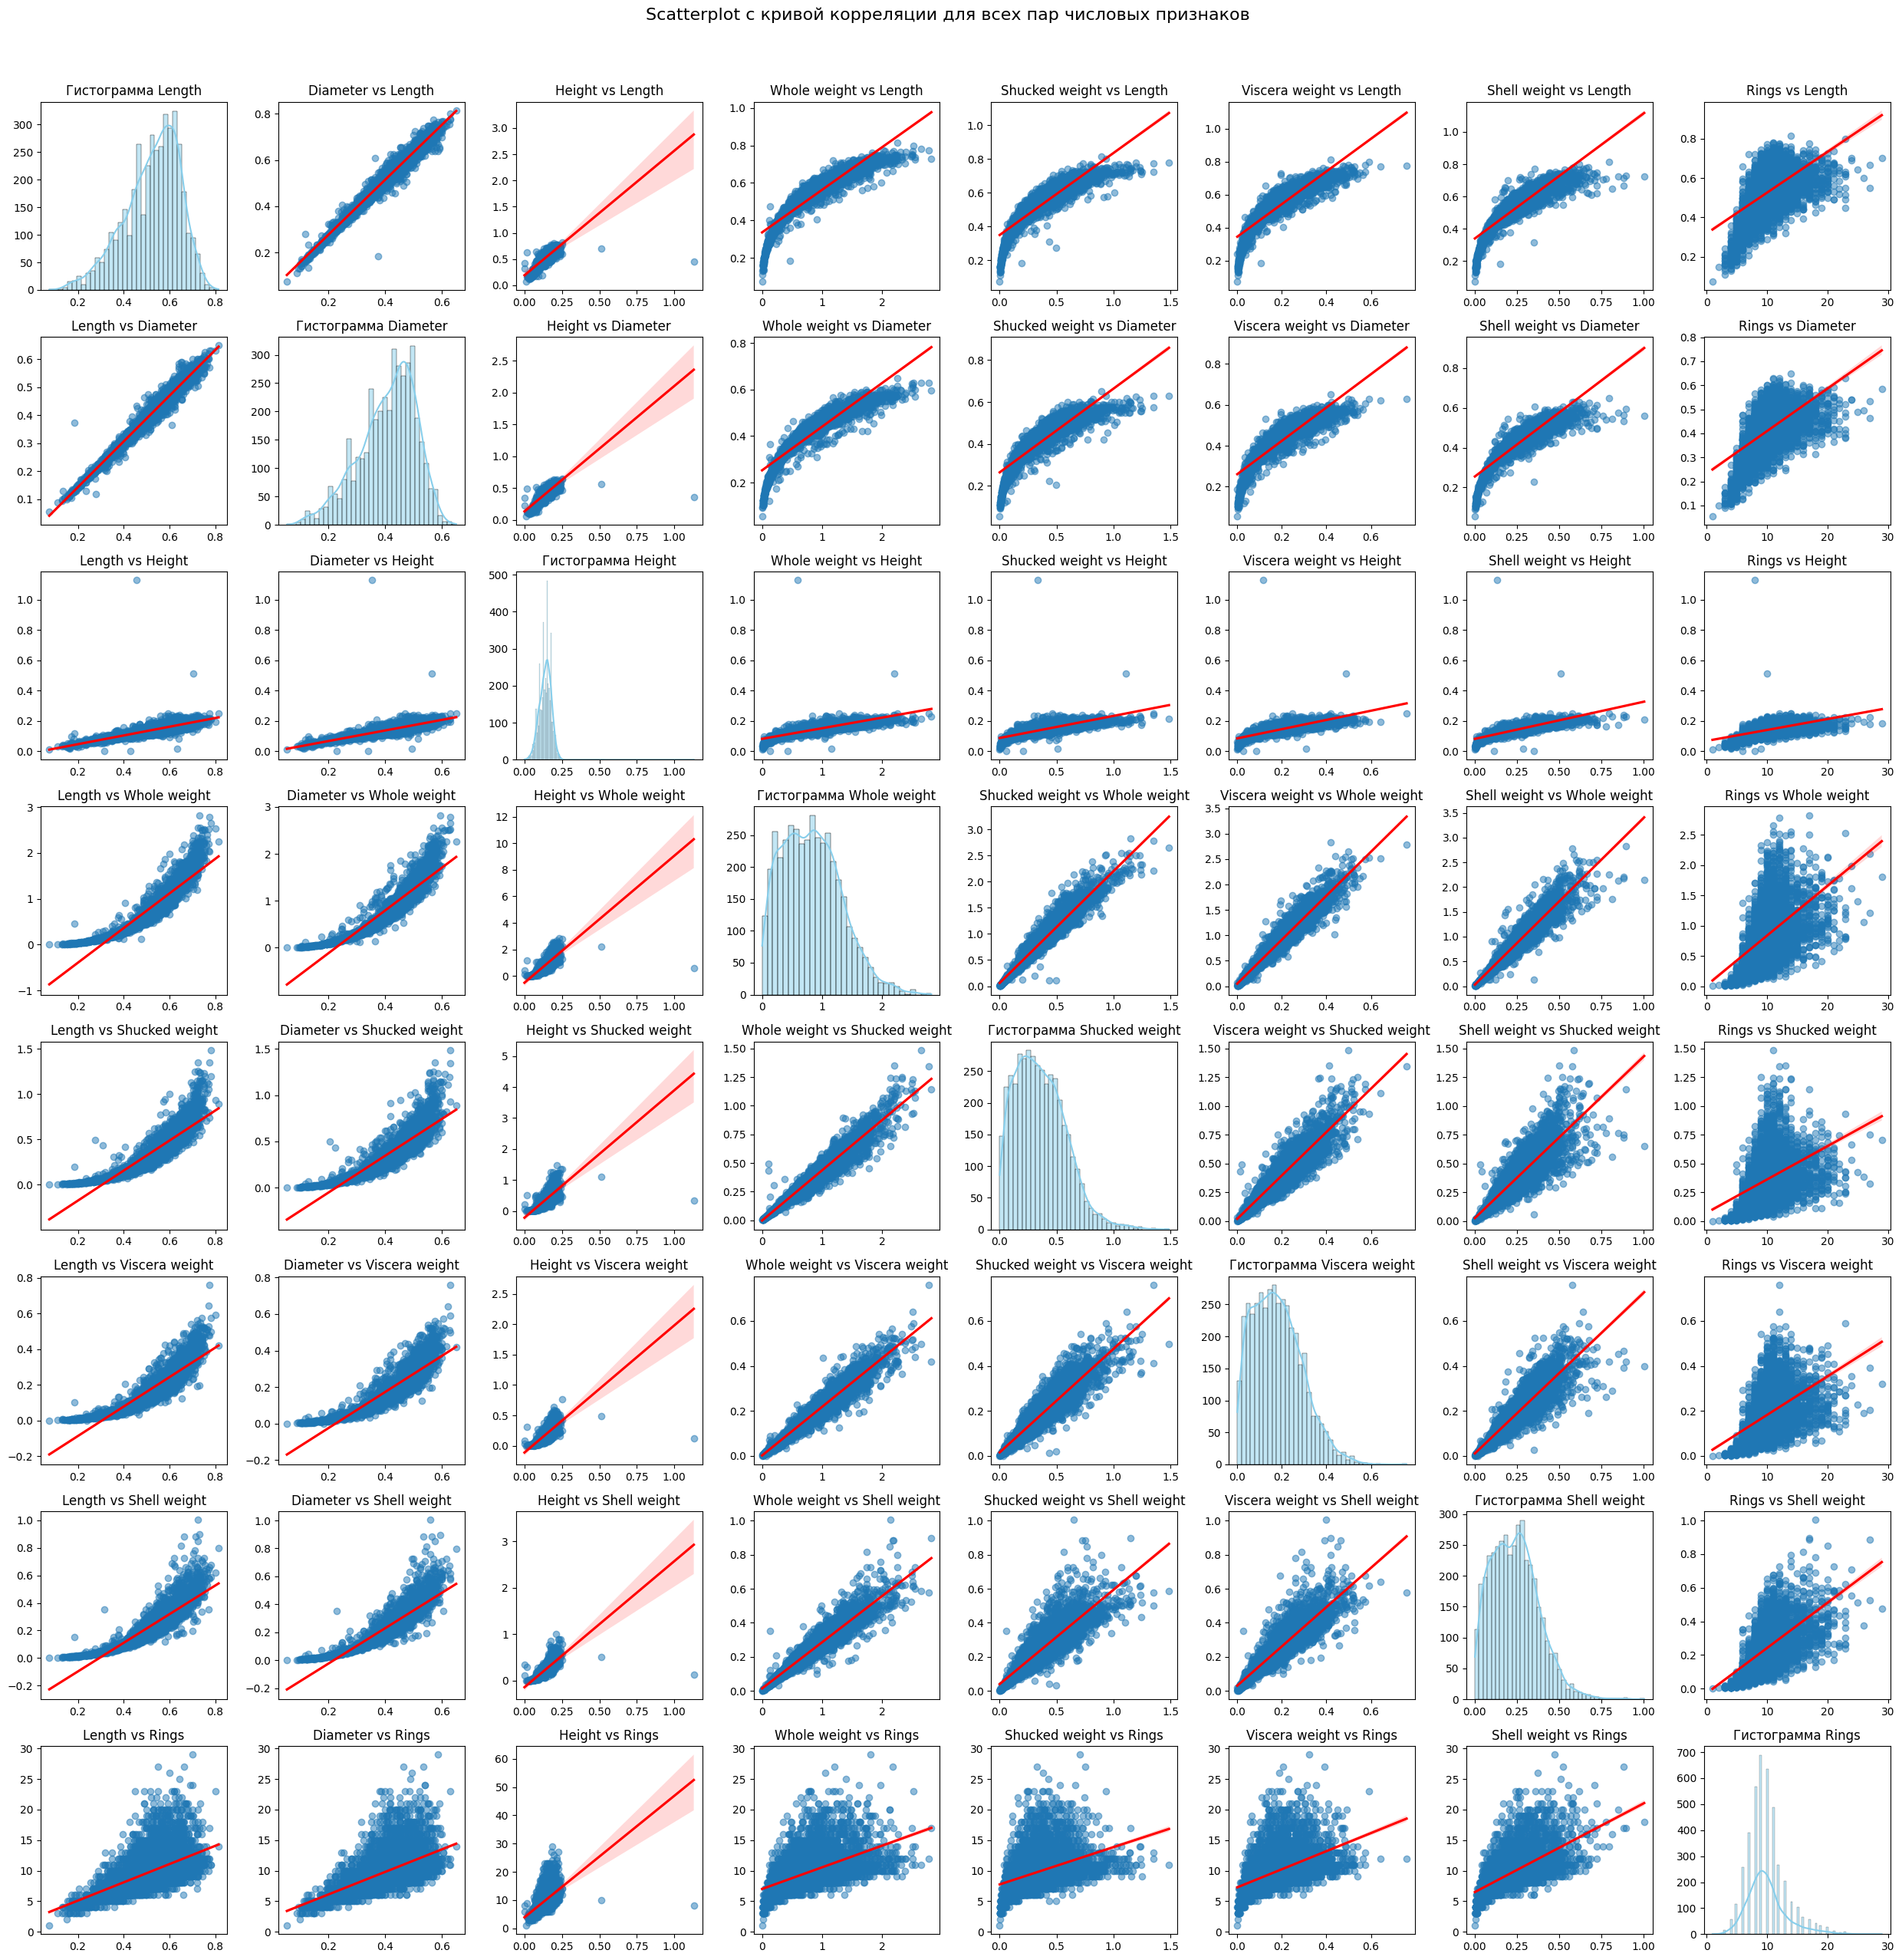

In [14]:
# Выбор числовых столбцов
numeric_columns = df.select_dtypes(include=['number']).columns
num_cols = len(numeric_columns)

# Определение размеров сетки
rows = num_cols
cols = num_cols

# Создание сетки подграфиков
fig, axes = plt.subplots(rows, cols, figsize=(25, 25))
fig.suptitle('Scatterplot с кривой корреляции для всех пар числовых признаков', y=1.02, fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Построение scatterplot с линией корреляции
for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        ax = axes[i, j]
        if i == j:
            # Диагональ - гистограмма для каждого признака
            sns.histplot(df[col1], ax=ax, kde=True, color='skyblue')
            ax.set_title(f'Гистограмма {col1}')
        else:
            # Scatterplot с линией регрессии
            sns.regplot(x=df[col2], y=df[col1], ax=ax, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
            ax.set_title(f'{col2} vs {col1}')
        ax.set_xlabel('')
        ax.set_ylabel('')

# Улучшение компоновки
plt.tight_layout()
plt.show()

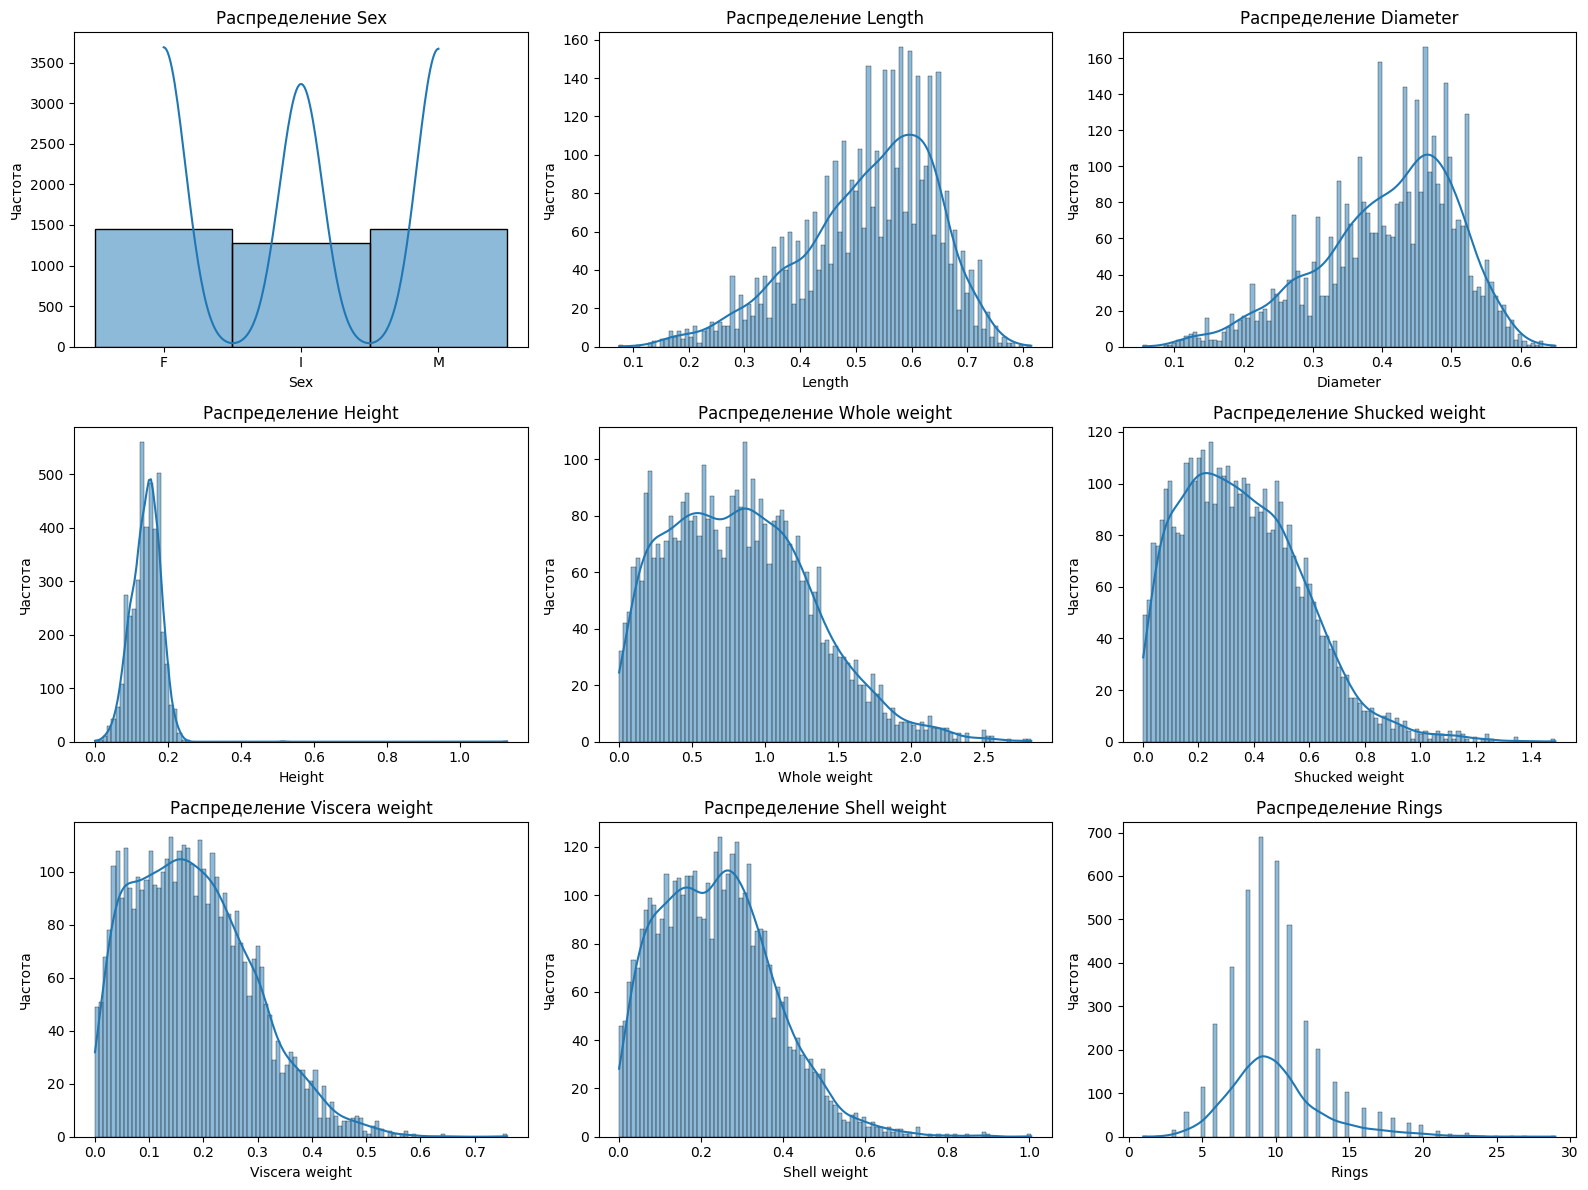

In [15]:
#постоим гистограмму с плотностью распределения для каждого столбца

# for cols in df:
#     plt.figure(figsize=(4,3))
#     sns.histplot(df[cols], bins=100, kde=True);
#     plt.xlabel(cols)


# Количество столбцов для визуализации
columns = df.columns
num_cols = len(columns)

# Определение размеров сетки
rows = (num_cols + 2) // 3  # Вычисляем количество строк (3 графика в строке)

# Создание сетки подграфиков
fig, axes = plt.subplots(rows, 3, figsize=(16, rows * 4))
axes = axes.flatten()  # Разворачиваем массив подграфиков в 1D для итерации

# Построение графиков
for i, col in enumerate(columns):
    sns.histplot(df[col], bins=100, kde=True, ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

# Удаление пустых подграфиков
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Автоматическая подгонка макета
plt.show()

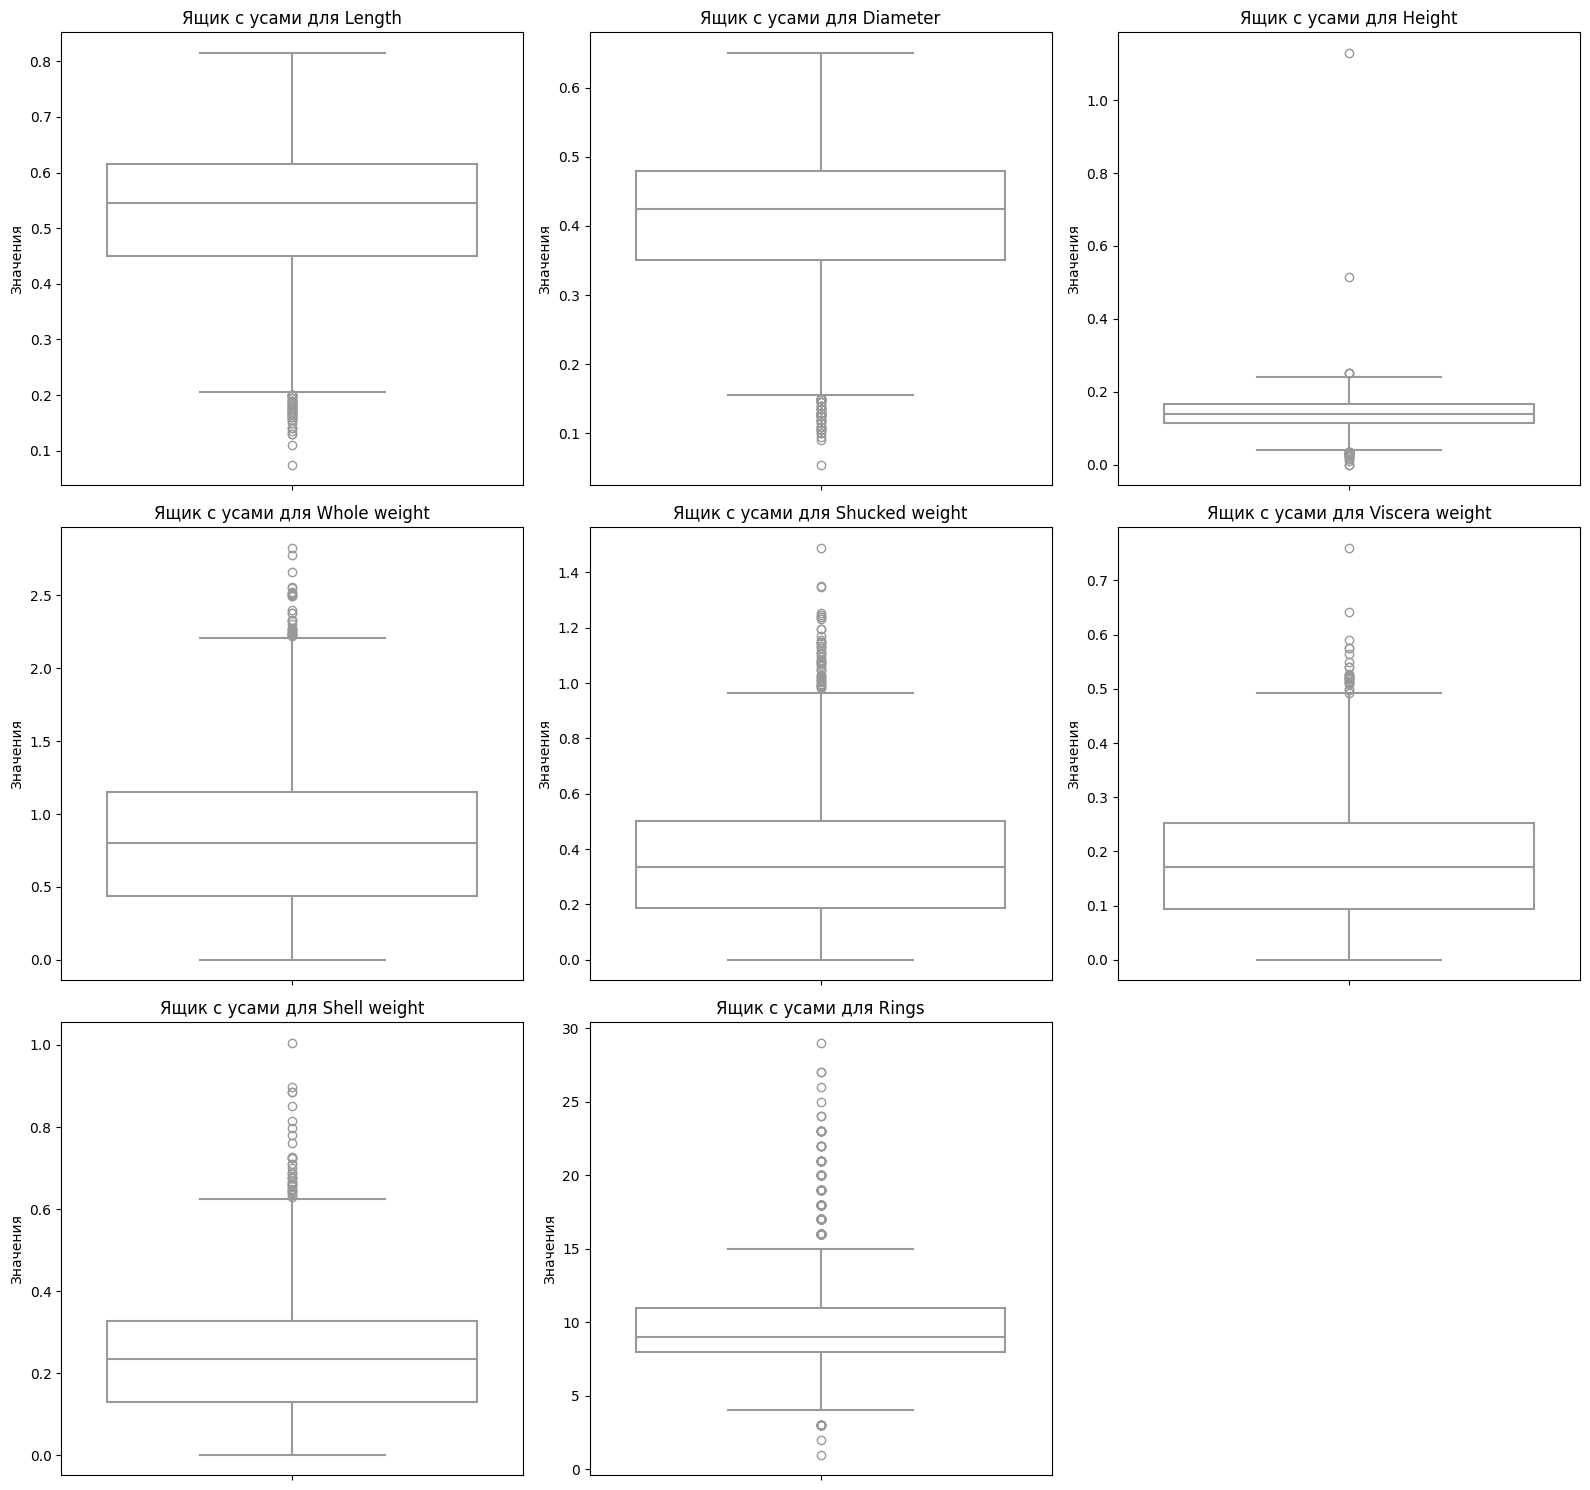

In [16]:
# Построение ящика с усами для каждого числового признака отдельно

# numeric_columns = df.select_dtypes(include=['number']).columns
# for column in numeric_columns:
#     plt.figure(figsize=(8, 6))
#     df.boxplot(column=column)
#     plt.title(f'Ящик с усами для {column}')
#     plt.ylabel('Значения')
#     plt.grid(axis='y')
#     plt.show()

# Выбор числовых столбцов
numeric_columns = df.select_dtypes(include=['number']).columns

# Определение размеров сетки
num_cols = len(numeric_columns)
rows = (num_cols + 2) // 3  # Количество строк (3 графика на строку)

# Создание сетки подграфиков
fig, axes = plt.subplots(rows, 3, figsize=(16, rows * 5))
axes = axes.flatten()

# Построение boxplot для каждого числового признака без заливки
for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df[column], ax=axes[i], color='white', linewidth=1.5)
    axes[i].set_title(f'Ящик с усами для {column}')
    axes[i].set_ylabel('Значения')

# Удаление лишних осей
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Улучшение компоновки графиков
plt.tight_layout()
plt.show()

<h2>2. Однофакторный анализ</h2>

In [17]:
#поиск пропусков
df.isnull().mean()

Sex               0.000000
Length            0.000000
Diameter          0.023701
Height            0.000000
Whole weight      0.023701
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      0.011970
Rings             0.000000
dtype: float64

In [18]:
#тк количество пропусков меньше процента, я решила заменить пропуски медианой
for cols in df:
    if df[cols].isnull().sum() != 0:
        median = df[cols].median()
        df[cols].fillna(median, inplace=True)

In [19]:
#еще раз проверим на пропуски
df.isnull().mean()

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64

Box-Cox применен к Length
Box-Cox применен к Diameter
Yeo-Johnson применен к Height
Box-Cox применен к Whole weight
Box-Cox применен к Shucked weight
Box-Cox применен к Viscera weight
Box-Cox применен к Shell weight
Box-Cox применен к Rings


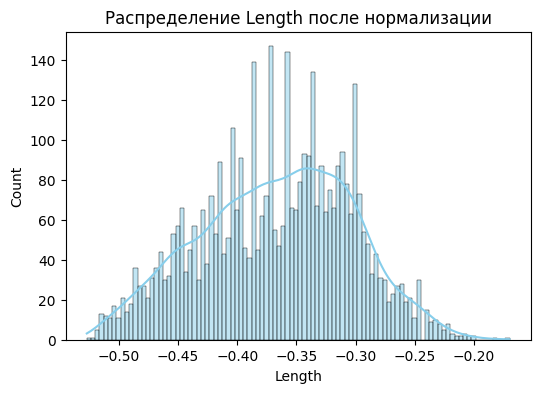

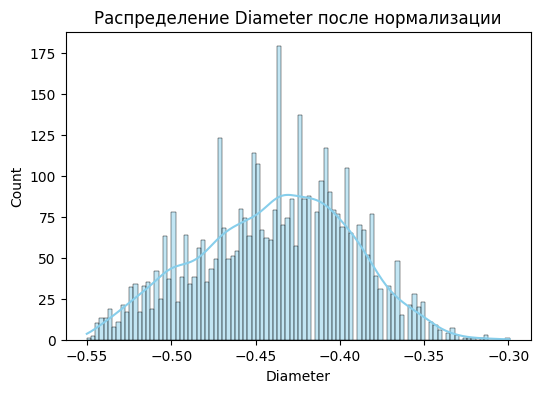

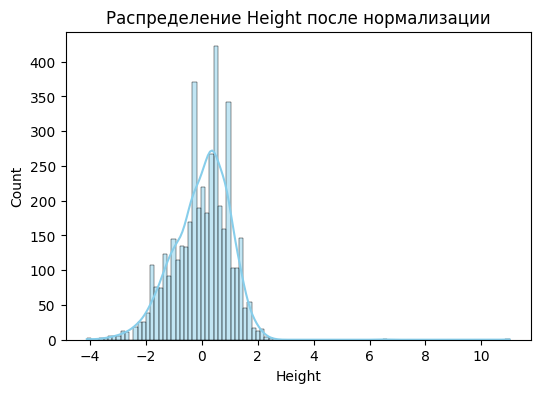

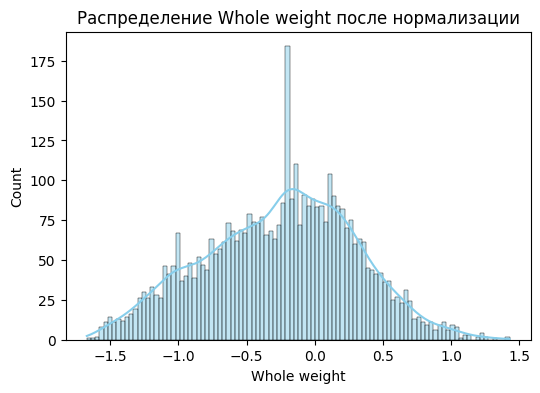

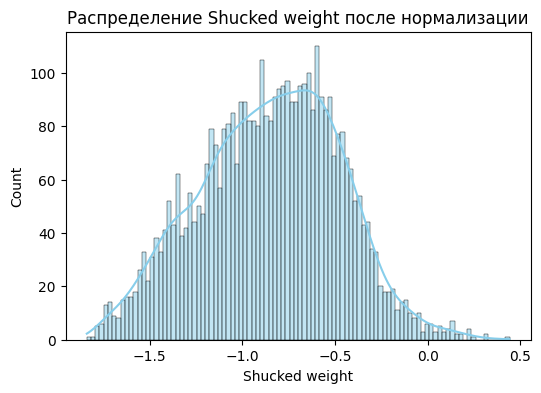

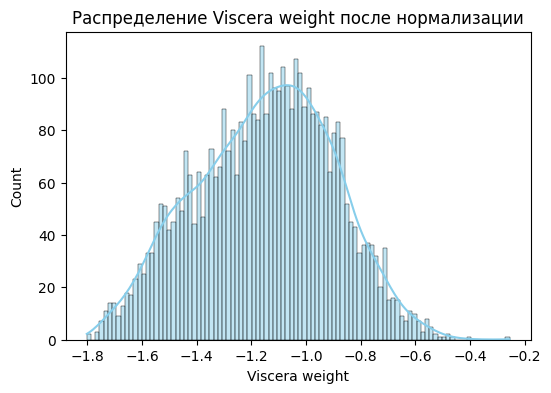

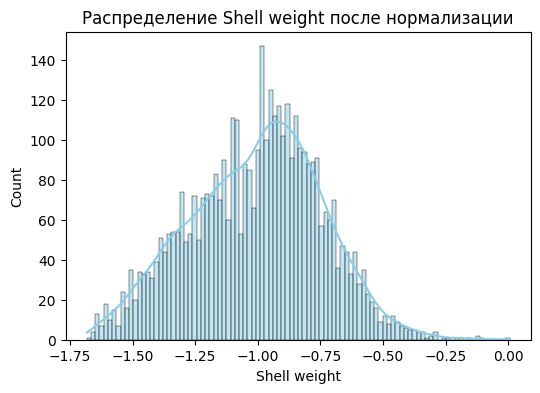

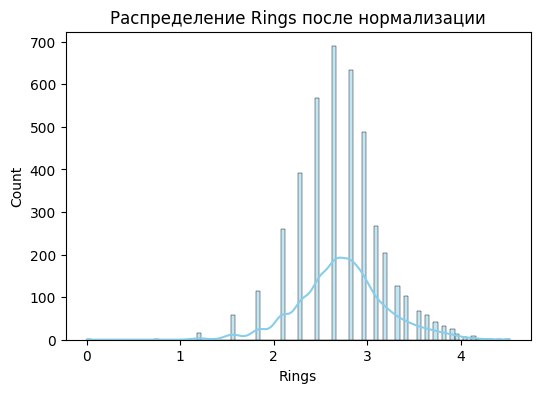

In [20]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Преобразование данных к нормальному распределению
df_transformed = df.copy()
for col in numeric_columns:
    if (df[col] > 0).all():  # Box-Cox работает только для положительных значений
        df_transformed[col], _ = boxcox(df[col] + 1e-6)  # Добавляем маленькое число, чтобы избежать нулей
        print(f'Box-Cox применен к {col}')
    else:
        # Используем Yeo-Johnson для данных с нулями
        pt = PowerTransformer(method='yeo-johnson')
        df_transformed[col] = pt.fit_transform(df[[col]])
        print(f'Yeo-Johnson применен к {col}')

# Проверка распределений после нормализации
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_transformed[col], kde=True, color='skyblue', bins=100)
    plt.title(f'Распределение {col} после нормализации')
    plt.show()

<h2>3. Построить матрицу корреляций</h2>

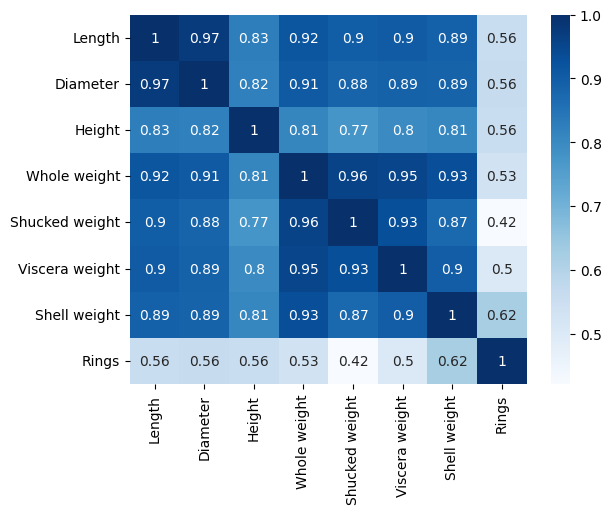

In [21]:
#корреляция Пирсона
corr_pirs = df.corr(numeric_only=True) # матрица корреляций
sns.heatmap(corr_pirs, cmap="Blues", annot=True);

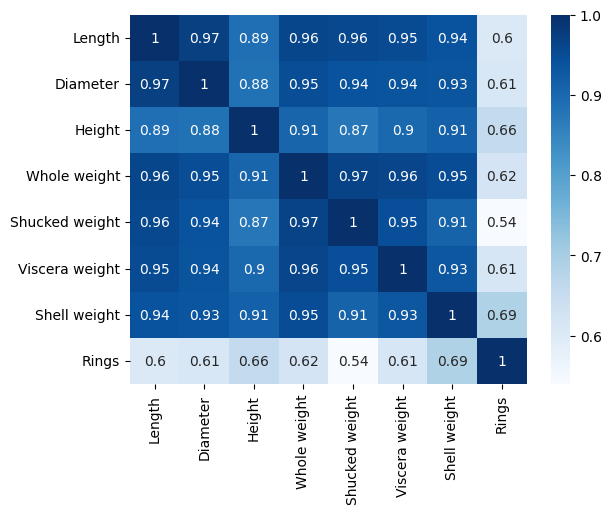

In [22]:
#Корреляция Спирмена
corr_spir = df.corr(method='spearman', numeric_only=True) # матрица корреляций
sns.heatmap(corr_spir, cmap="Blues", annot=True);

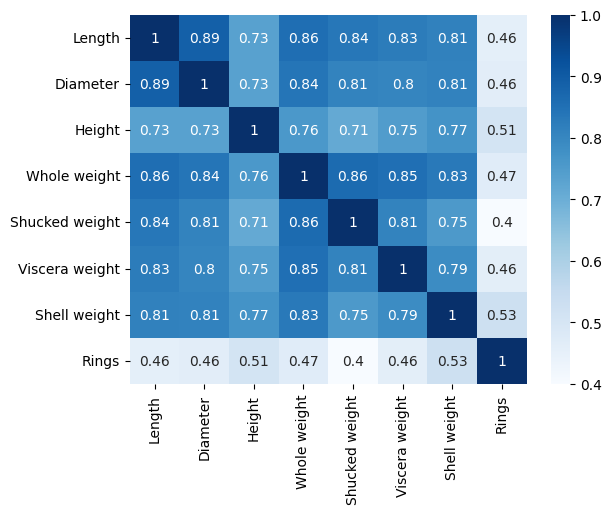

In [23]:
#Корреляция Кендалла
corr_kend = df.corr(method='kendall', numeric_only=True) # матрица корреляций
sns.heatmap(corr_kend, cmap="Blues", annot=True);

In [24]:
#построим V-меру Краммера для двух категоральных значений: Rings и Sex
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "int64" else x)

cramersv = am.CramersV(df_cat)
cramersv.fit()

,Sex,Rings
Sex,1.000000,0.386311
Rings,0.386311,1.000000


In [25]:
#проведем ANOVA между категоральными и численными значениями
from scipy.stats import f_oneway

corr_object = []

for c1 in df_cat.select_dtypes(include=['category']):
    for c2 in df_cat.select_dtypes(include=['float']):
        category_group_lists = df_cat.groupby(c1, observed=True)[c2].apply(list)
        anova_results = f_oneway(*category_group_lists)

        if anova_results[1] >= 0.05:
            corr_object.append({'category': c1, 'numerical': c2, 'is correlated': 'No'})
        else:
            corr_object.append({'category': c1, 'numerical': c2, 'is correlated': 'Yes'})

anova_general_result = pd.DataFrame.from_dict(corr_object)
anova_general_result

,category,numerical,is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Rings,Length,Yes
8,Rings,Diameter,Yes
9,Rings,Height,Yes
